In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"arumugasundar007","key":"2e8c7c768e290af709d59603c465a312"}'}

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c malware-analysis-hackathon

 83% 113M/137M [00:00<00:00, 257MB/s] 
100% 137M/137M [00:00<00:00, 228MB/s]


In [ ]:
!kaggle competitions download -c malware-analysis-hackathon-stage-2-iit-madras

100% 140M/140M [00:00<00:00, 171MB/s]
100% 140M/140M [00:00<00:00, 152MB/s]


In [ ]:
!unzip malware-analysis-hackathon.zip

Archive:  malware-analysis-hackathon.zip
  inflating: evaluation_dataset/evaluation_dataset/evaluation_hardware_trails  
  inflating: evaluation_dataset/evaluation_dataset/evaluation_network_trails  
  inflating: evaluation_dataset/evaluation_dataset/evaluation_os_trails  
  inflating: train_dataset/train_dataset/training_hardware_trails  
  inflating: train_dataset/train_dataset/training_network_trails  
  inflating: train_dataset/train_dataset/training_os_trails  


In [ ]:
!unzip malware-analysis-hackathon-stage-2-iit-madras.zip

Archive:  malware-analysis-hackathon-stage-2-iit-madras.zip
  inflating: final_evaluation_set/final_hardware_evaluation.csv  
  inflating: final_evaluation_set/final_network_evaluation.csv  
  inflating: final_evaluation_set/final_os_evaluation.csv  
  inflating: train_dataset_final/train_dataset/training_hardware_trails  
  inflating: train_dataset_final/train_dataset/training_network_trails  
  inflating: train_dataset_final/train_dataset/training_os_trails  


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
file_path = '/content/train_dataset/train_dataset/training_hardware_trails'
df_s1 = pd.read_csv(file_path, sep="," )


In [ ]:
df_s1.head()

,Unnamed: 0,Filename,Core_cyc,Ref_cyc,Instruct,Ins_Retd,ILenStal,DTLBLoadMissWD,DTLBStoreMissW,DTLBStrMiss_SH,...,goal,family_gene,keylog,bkdoor,infosteal,rootkits,method_encoded,goal_encoded,family_encoded,infosteal_encoded
0,0,0e226971d45ce6d098ee17708a600968.csv,29343199,28505056,11515203,11515227,0,866555,2508,24999,...,backdoor,Agent,0,0,0,0,6,2,2,0
1,1,0e226971d45ce6d098ee17708a600968.csv,47380408,46026820,28358315,28358325,0,1215550,1098,11255,...,backdoor,Agent,0,0,0,0,6,2,2,0
2,2,0e226971d45ce6d098ee17708a600968.csv,585204,568174,153054,153054,0,1180484,1546,16126,...,backdoor,Agent,0,0,0,0,6,2,2,0
3,3,0e226971d45ce6d098ee17708a600968.csv,582759,565998,219238,219239,0,41630,44,468,...,backdoor,Agent,0,0,0,0,6,2,2,0
4,4,0e226971d45ce6d098ee17708a600968.csv,606210,589186,118167,118170,0,754152,1637,10437,...,backdoor,Agent,0,0,0,0,6,2,2,0


In [ ]:
df_s1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 803803 entries, 0 to 803802
Data columns (total 71 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Unnamed: 0         803803 non-null  int64 
 1   Filename           803803 non-null  object
 2   Core_cyc           803803 non-null  int64 
 3   Ref_cyc            803803 non-null  int64 
 4   Instruct           803803 non-null  int64 
 5   Ins_Retd           803803 non-null  int64 
 6   ILenStal           803803 non-null  int64 
 7   DTLBLoadMissWD     803803 non-null  int64 
 8   DTLBStoreMissW     803803 non-null  int64 
 9   DTLBStrMiss_SH     803803 non-null  int64 
 10  DTLBStrMiss_WC     803803 non-null  int64 
 11  DTLBStrMiss_WD     803803 non-null  int64 
 12  FP_Assist_ANY      803803 non-null  int64 
 13  HW_Intrs_Rcvd      803803 non-null  int64 
 14  ICache_Misses      803803 non-null  int64 
 15  IDQ_All_DSB_C      803803 non-null  int64 
 16  IDQ_AllMite_UO     8

In [ ]:
df_s1['goal'].value_counts()

,count
goal,
pua,289289
downloader,182182
deceptor,145145
backdoor,74074
cryptominer,42042
normal,40040
spyware,16016
banker,8008
ransomware,7007


In [ ]:
unique_columns = [col for col in df_s1.columns if df_s1[col].nunique() == 1]
print(unique_columns)

['ILenStal', 'Mov_elim-', 'infosteal', 'rootkits', 'infosteal_encoded']


In [ ]:
# Columns to remove
# Unnamed: 0 & Filename also seems to be not useful
# goal_encoded to make predictions reliable
columns_to_remove = ['Unnamed: 0', 'Filename', 'ILenStal', 'Mov_elim-', 'infosteal', 'rootkits', 'infosteal_encoded', 'goal_encoded']

# # Drop the specified columns
df_s2 = df_s1.drop(columns=columns_to_remove)

In [ ]:
df_s2.head()

,Core_cyc,Ref_cyc,Instruct,Ins_Retd,DTLBLoadMissWD,DTLBStoreMissW,DTLBStrMiss_SH,DTLBStrMiss_WC,DTLBStrMiss_WD,FP_Assist_ANY,...,full_label,label,binarylabel,method,goal,family_gene,keylog,bkdoor,method_encoded,family_encoded
0,29343199,28505056,11515203,11515227,866555,2508,24999,1877,14222,0,...,msil.agent.r_,2,1,worm,backdoor,Agent,0,0,6,2
1,47380408,46026820,28358315,28358325,1215550,1098,11255,731,4636,0,...,msil.agent.r_,2,1,worm,backdoor,Agent,0,0,6,2
2,585204,568174,153054,153054,1180484,1546,16126,786,2277,0,...,msil.agent.r_,2,1,worm,backdoor,Agent,0,0,6,2
3,582759,565998,219238,219239,41630,44,468,41,0,0,...,msil.agent.r_,2,1,worm,backdoor,Agent,0,0,6,2
4,606210,589186,118167,118170,754152,1637,10437,1234,2125,0,...,msil.agent.r_,2,1,worm,backdoor,Agent,0,0,6,2


In [ ]:
# print(df_s2['method'].value_counts())
print(df_s2['method_encoded'].value_counts())

# print(df_s2['family_gene'].value_counts())
# print(df_s2['family_encoded'].value_counts())

# print(df_s2['goal'].value_counts())
# print(df_s2['goal_encoded'].value_counts())

print(df_s2['bkdoor'].value_counts())
# print(df_s2['keylog'].value_counts())
# print(df_s2['binarylabel'].value_counts())

# print(df_s2['label'].value_counts())
# print(df_s2['full_label'].value_counts())

print(df_s2['DTLBLoadMissWC'].value_counts()) # highly random
# print(df_s2['DTLBLoadMiss_W'].value_counts()) # highly random
# print(df_s2['DSB2MIT_SW_CNT'].value_counts()) # highly random

method_encoded
2    658658
6     98098
1     40040
4      6006
0      1001
Name: count, dtype: int64
bkdoor
0    784784
1     19019
Name: count, dtype: int64
DTLBLoadMissWC
23       120612
22        53340
24        33429
25        12363
26         5876
          ...  
18129         1
18608         1
15400         1
17966         1
40154         1
Name: count, Length: 24927, dtype: int64


In [ ]:
columns_with_minimal_unique_values = df_s2.columns[df_s2.nunique() <= 30]

# # method, goal, family_gene seems to be repetitive since we have encoded value
redundant_columns = ['method', 'family_gene', 'full_label']

filtered_columns = columns_with_minimal_unique_values.difference(redundant_columns)

df_s3 = df_s2[filtered_columns]

In [ ]:
filtered_columns

Index(['binarylabel', 'bkdoor', 'family_encoded', 'goal', 'keylog', 'label',
       'method_encoded'],
      dtype='object')

In [ ]:
df_s3.head()

,binarylabel,bkdoor,family_encoded,goal,keylog,label,method_encoded
0,1,0,2,backdoor,0,2,6
1,1,0,2,backdoor,0,2,6
2,1,0,2,backdoor,0,2,6
3,1,0,2,backdoor,0,2,6
4,1,0,2,backdoor,0,2,6


In [ ]:
# Take a random sample of 500 rows from df_s3
temp_df = df_s1.sample(n=500, random_state=42)  # random_state for reproducibility

# Print the sampled DataFrame
print(temp_df)

# Save the sampled DataFrame as a CSV file
temp_df.to_csv('sampled_data.csv', index=False)

# For Google Colab: download the file
from google.colab import files
files.download('sampled_data.csv')

        binarylabel  bkdoor  family_encoded        goal  goal_encoded  keylog  \
154018            1       0              18         pua             8       0   
532383            1       0               9    deceptor             5       0   
228832            1       0              18         pua             8       0   
497336            1       0               2    backdoor             2       0   
128120            1       0              18         pua             8       0   
...             ...     ...             ...         ...           ...     ...   
544183            1       0              18         pua             8       0   
783606            1       0               9    deceptor             5       0   
274846            1       0              18         pua             8       0   
123567            1       0               2  downloader             6       0   
744083            1       0              18         pua             8       0   

        label  method_encod

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
temp_df['goal'].value_counts()

,count
goal,
pua,185
downloader,125
deceptor,89
backdoor,40
normal,29
cryptominer,22
banker,4
spyware,3
ransomware,3


In [ ]:
first_10_records = temp_df.head(10)
json_output = first_10_records.to_json(orient='records')
print(json_output)

[{"binarylabel":1,"bkdoor":0,"family_encoded":18,"goal":"pua","goal_encoded":8,"keylog":0,"label":3,"method_encoded":2},{"binarylabel":1,"bkdoor":0,"family_encoded":9,"goal":"deceptor","goal_encoded":5,"keylog":0,"label":49,"method_encoded":2},{"binarylabel":1,"bkdoor":0,"family_encoded":18,"goal":"pua","goal_encoded":8,"keylog":0,"label":50,"method_encoded":2},{"binarylabel":1,"bkdoor":0,"family_encoded":2,"goal":"backdoor","goal_encoded":2,"keylog":0,"label":2,"method_encoded":6},{"binarylabel":1,"bkdoor":0,"family_encoded":18,"goal":"pua","goal_encoded":8,"keylog":0,"label":50,"method_encoded":2},{"binarylabel":1,"bkdoor":0,"family_encoded":18,"goal":"pua","goal_encoded":8,"keylog":0,"label":50,"method_encoded":2},{"binarylabel":1,"bkdoor":0,"family_encoded":9,"goal":"deceptor","goal_encoded":5,"keylog":0,"label":1,"method_encoded":2},{"binarylabel":1,"bkdoor":0,"family_encoded":2,"goal":"downloader","goal_encoded":6,"keylog":0,"label":31,"method_encoded":2},{"binarylabel":1,"bkdoor

In [ ]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 154018 to 744083
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   binarylabel     500 non-null    int64 
 1   bkdoor          500 non-null    int64 
 2   family_encoded  500 non-null    int64 
 3   goal            500 non-null    object
 4   goal_encoded    500 non-null    int64 
 5   keylog          500 non-null    int64 
 6   label           500 non-null    int64 
 7   method_encoded  500 non-null    int64 
dtypes: int64(7), object(1)
memory usage: 51.3+ KB


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
# For accuracy test purpose

# Features (excluding the target variable)
X = df_s3.drop(columns=['goal'])  # Drop the target and non-numeric columns if needed

# Target variable
y = df_s3['goal']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

    backdoor       1.00      1.00      1.00     22180
      banker       1.00      1.00      1.00      2386
 cryptominer       1.00      1.00      1.00     12422
    deceptor       1.00      1.00      1.00     43624
  downloader       1.00      1.00      1.00     54741
      normal       1.00      1.00      1.00     11916
         pua       1.00      1.00      1.00     87002
  ransomware       1.00      1.00      1.00      2118
     spyware       1.00      1.00      1.00      4752

    accuracy                           1.00    241141
   macro avg       1.00      1.00      1.00    241141
weighted avg       1.00      1.00      1.00    241141



In [ ]:
file_path = '/content/evaluation_dataset/evaluation_dataset/evaluation_hardware_trails'
# file_path = '/content/final_evaluation_set/final_hardware_evaluation.csv'
ev_df = pd.read_csv(file_path)

In [ ]:
ev_df.head()

,Unnamed: 0,Filename,Core_cyc,Ref_cyc,Instruct,Ins_Retd,ILenStal,DTLBLoadMissWD,DTLBStoreMissW,DTLBStrMiss_SH,...,method,family_gene,keylog,bkdoor,infosteal,rootkits,method_encoded,goal_encoded,family_encoded,infosteal_encoded
0,0,c5b1e4d675be2758c0ae1860a206bfce.csv,87235658,84743572,43874029,43874378,0,157591,1340,2669,...,trojan,Coinminer,0,0,0,0,2,4,24,0
1,1,c5b1e4d675be2758c0ae1860a206bfce.csv,41629998,40440620,39747603,39748312,0,155958,3611,6241,...,trojan,Coinminer,0,0,0,0,2,4,24,0
2,2,c5b1e4d675be2758c0ae1860a206bfce.csv,33521840,32564622,18843730,18844018,0,622380,1788,6796,...,trojan,Coinminer,0,0,0,0,2,4,24,0
3,3,c5b1e4d675be2758c0ae1860a206bfce.csv,40494725,39337932,22719422,22719622,0,1484468,3432,11618,...,trojan,Coinminer,0,0,0,0,2,4,24,0
4,4,c5b1e4d675be2758c0ae1860a206bfce.csv,26211886,25462430,12393262,12393483,0,725662,1102,6009,...,trojan,Coinminer,0,0,0,0,2,4,24,0


In [ ]:
# For model submission

# Features (excluding the target variable)
X = df_s3.drop(columns=['goal'])  # Drop the target and non-numeric columns if needed

# Target variable
y = df_s3['goal']

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X, y)

test_df = ev_df.drop(columns=['Unnamed: 0', 'Filename', 'ILenStal', 'Mov_elim-', 'infosteal', 'rootkits', 'infosteal_encoded', 'goal_encoded'])
columns_to_use = test_df.columns[test_df.nunique() <= 30]
redundant_columns = ['method', 'family_gene', 'full_label']
filtered_columns = columns_to_use.difference(redundant_columns)
X_test = test_df[filtered_columns]

# Make predictions
y_pred = rf_classifier.predict(X_test)

print(y_pred)

['cryptominer' 'cryptominer' 'cryptominer' ... 'normal' 'normal' 'normal']


In [ ]:
num_records = ev_df.shape[0]
print(num_records, len(y_pred))

203203 203203


In [ ]:
df = pd.DataFrame({
    'Id': range(1, len(y_pred) + 1),  # Create a sequence of IDs starting from 1
    'Goal': y_pred
})

# Save the DataFrame to a CSV file
df.to_csv('submission_hardware.csv', index=False)

from google.colab import files
files.download('submission_hardware.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install -U imbalanced-learn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from imblearn.over_sampling import RandomOverSampler

In [ ]:
file_path = '/content/train_dataset/train_dataset/training_hardware_trails'
tf_df = pd.read_csv(file_path, sep="," )

In [ ]:
tf_df.head()

,Unnamed: 0,Filename,Core_cyc,Ref_cyc,Instruct,Ins_Retd,ILenStal,DTLBLoadMissWD,DTLBStoreMissW,DTLBStrMiss_SH,...,goal,family_gene,keylog,bkdoor,infosteal,rootkits,method_encoded,goal_encoded,family_encoded,infosteal_encoded
0,0,0e226971d45ce6d098ee17708a600968.csv,29343199,28505056,11515203,11515227,0,866555,2508,24999,...,backdoor,Agent,0,0,0,0,6,2,2,0
1,1,0e226971d45ce6d098ee17708a600968.csv,47380408,46026820,28358315,28358325,0,1215550,1098,11255,...,backdoor,Agent,0,0,0,0,6,2,2,0
2,2,0e226971d45ce6d098ee17708a600968.csv,585204,568174,153054,153054,0,1180484,1546,16126,...,backdoor,Agent,0,0,0,0,6,2,2,0
3,3,0e226971d45ce6d098ee17708a600968.csv,582759,565998,219238,219239,0,41630,44,468,...,backdoor,Agent,0,0,0,0,6,2,2,0
4,4,0e226971d45ce6d098ee17708a600968.csv,606210,589186,118167,118170,0,754152,1637,10437,...,backdoor,Agent,0,0,0,0,6,2,2,0


In [ ]:
columns_to_remove = ['Unnamed: 0', 'Filename', 'ILenStal', 'Mov_elim-', 'infosteal', 'rootkits', 'infosteal_encoded', 'method', 'family_gene', 'full_label']
tf_df = tf_df.drop(columns=columns_to_remove)
columns_with_minimal_unique_values = tf_df.columns[tf_df.nunique() <= 30]
tf_df = tf_df[columns_with_minimal_unique_values]

In [ ]:
columns_with_minimal_unique_values

Index(['label', 'binarylabel', 'goal', 'keylog', 'bkdoor', 'method_encoded',
       'goal_encoded', 'family_encoded'],
      dtype='object')

In [ ]:
tf_df.head()

,label,binarylabel,goal,keylog,bkdoor,method_encoded,goal_encoded,family_encoded
0,2,1,backdoor,0,0,6,2,2
1,2,1,backdoor,0,0,6,2,2
2,2,1,backdoor,0,0,6,2,2
3,2,1,backdoor,0,0,6,2,2
4,2,1,backdoor,0,0,6,2,2


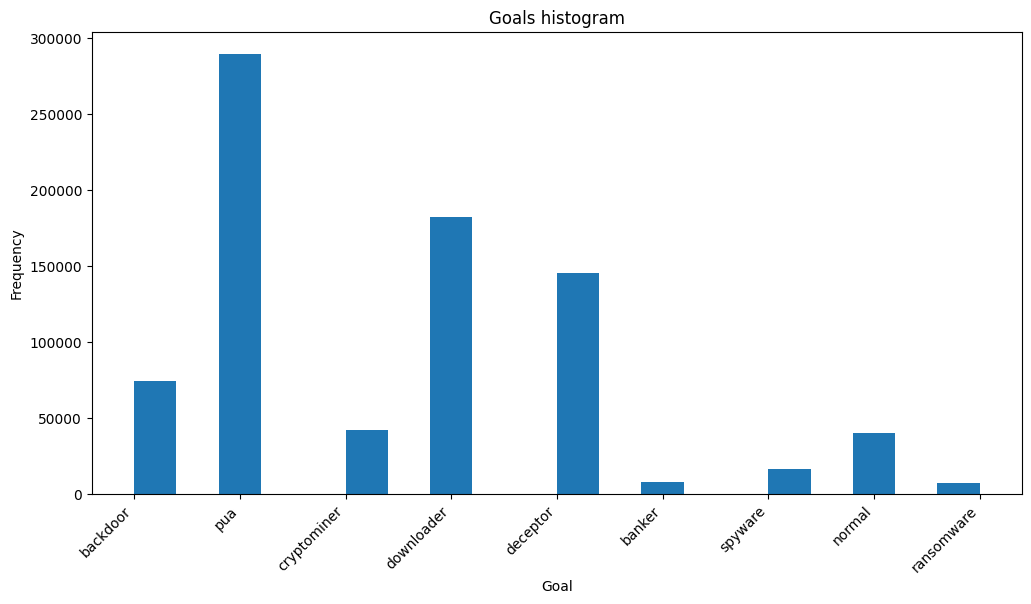

In [ ]:
plt.figure(figsize=(12, 6))
plt.hist(tf_df.goal, bins=20)
plt.xticks(rotation=45, ha='right')
plt.title("Goals histogram")
plt.ylabel("Frequency")
plt.xlabel("Goal")
plt.show()

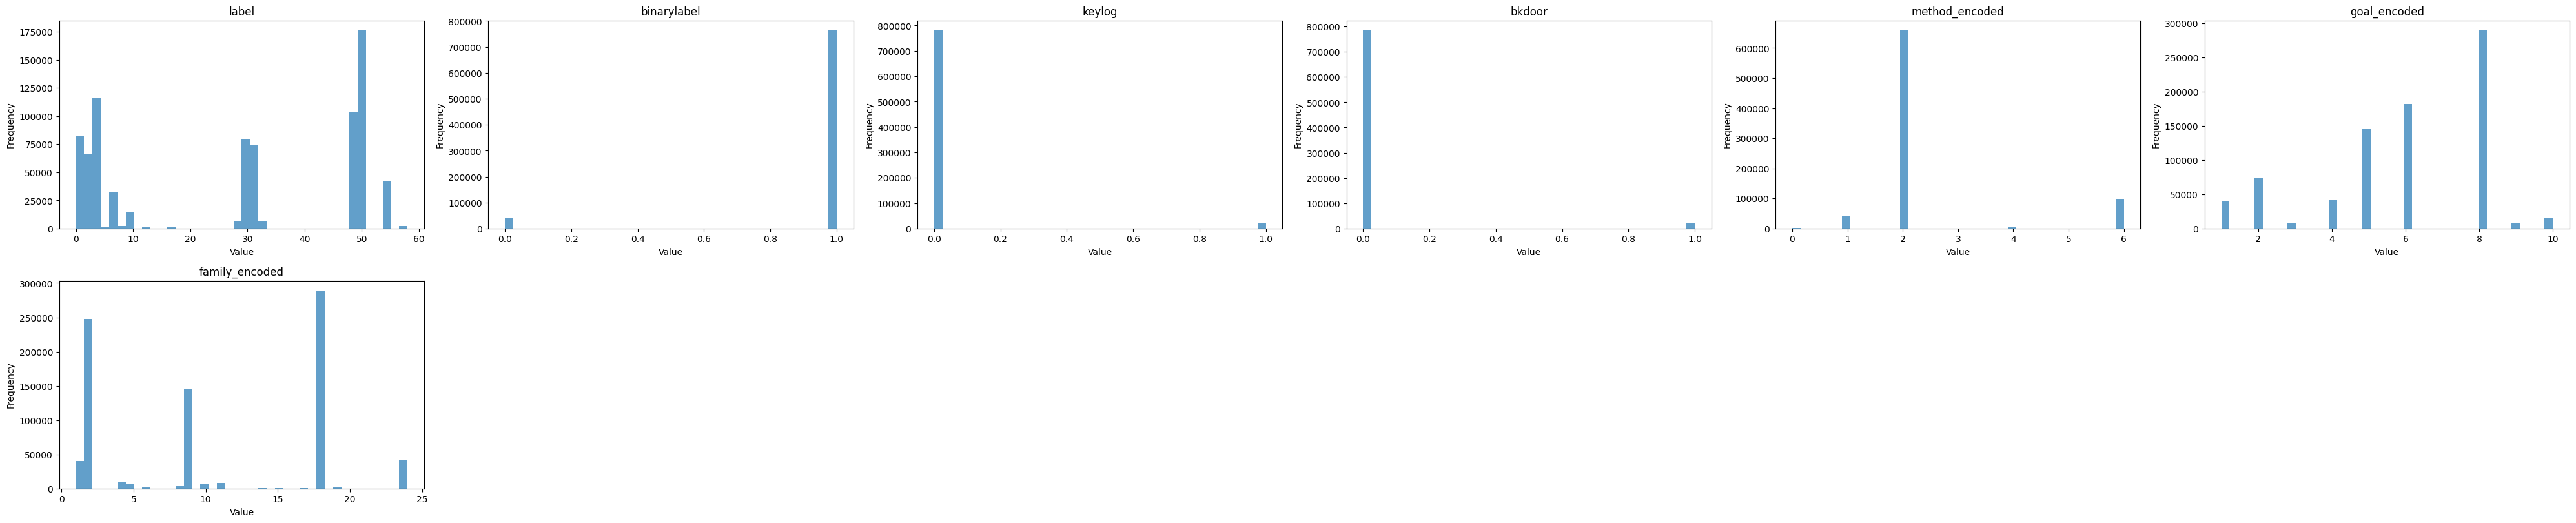

In [ ]:
features = tf_df.drop(columns=['goal']).columns

# Set up the number of rows and columns for subplots
n_rows = 10   # Number of rows for subplots
n_cols = 6    # Number of columns for subplots

# Create a figure with multiple subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(40, 40))  # Adjust size based on features
# fig, axes = plt.subplots(n_rows, n_cols)  # Adjust size based on features

# Flatten the axes array to easily index them
axes = axes.flatten()

# Loop through each feature and plot a histogram in the corresponding subplot
for i, feature in enumerate(features):
    axes[i].hist(tf_df[feature], bins=40, alpha=0.7, label=feature)
    axes[i].set_title(feature)  # Set title for each feature
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

# Remove any extra subplots that don't have any data
for i in range(len(features), n_rows * n_cols):
    fig.delaxes(axes[i])

# Display the chart
plt.tight_layout()
plt.show()

In [ ]:
X = tf_df.drop(columns=['goal']).values
y = tf_df['goal'].values

X,y

(array([[0, '0e226971d45ce6d098ee17708a600968.csv', 29343199, ..., 2, 2,
         0],
        [1, '0e226971d45ce6d098ee17708a600968.csv', 47380408, ..., 2, 2,
         0],
        [2, '0e226971d45ce6d098ee17708a600968.csv', 585204, ..., 2, 2, 0],
        ...,
        [803800, '5230284f982c86b94b559e082ae97ad0.csv', 301771, ..., 2,
         2, 0],
        [803801, '5230284f982c86b94b559e082ae97ad0.csv', 431484, ..., 2,
         2, 0],
        [803802, '5230284f982c86b94b559e082ae97ad0.csv', 0, ..., 2, 2, 0]],
       dtype=object),
 array(['backdoor', 'backdoor', 'backdoor', ..., 'backdoor', 'backdoor',
        'backdoor'], dtype=object))

In [ ]:
X.shape, y.shape

((803803, 70), (803803,))

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
data = np.hstack((X, np.reshape(y, (-1,1))))
tf_df = pd.DataFrame(data, columns=tf_df.columns)

ValueError: could not convert string to float: '0e226971d45ce6d098ee17708a600968.csv'

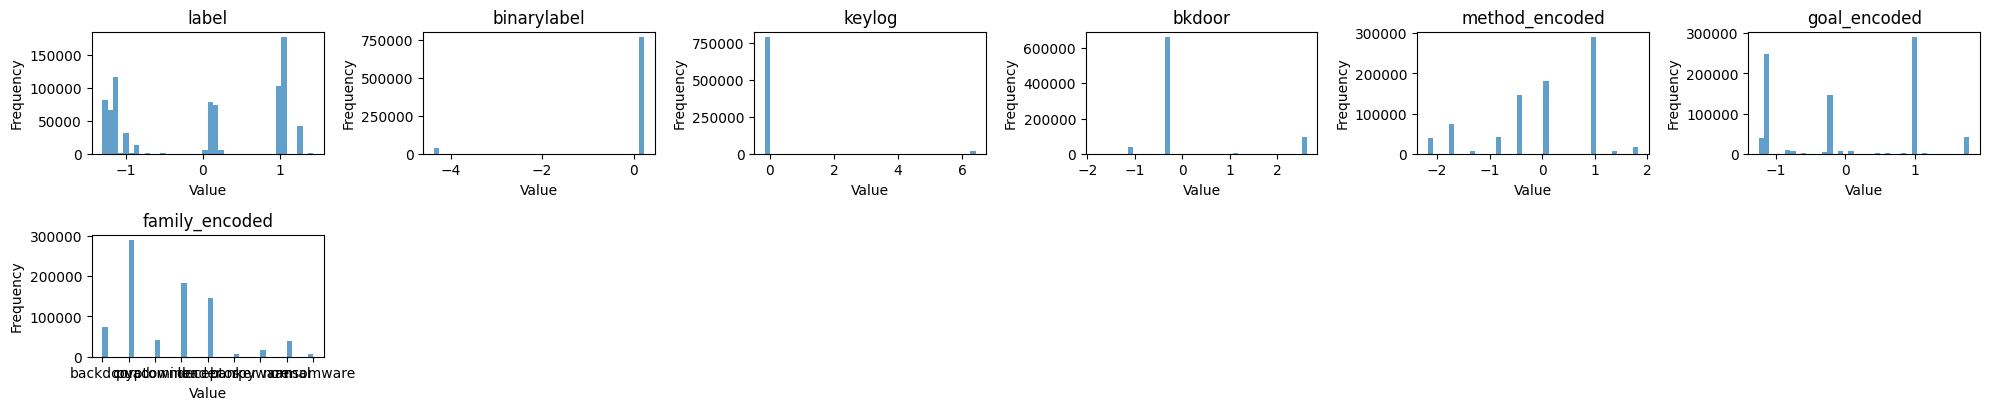

In [ ]:
features = tf_df.drop(columns=['goal']).columns

# Set up the number of rows and columns for subplots
n_rows = 10   # Number of rows for subplots
n_cols = 6    # Number of columns for subplots

# Create a figure with multiple subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 20))  # Adjust size based on features

# Flatten the axes array to easily index them
axes = axes.flatten()

# Loop through each feature and plot a histogram in the corresponding subplot
for i, feature in enumerate(features):
    axes[i].hist(tf_df[feature], bins=40, alpha=0.7, label=feature)
    axes[i].set_title(feature)  # Set title for each feature
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

# Remove any extra subplots that don't have any data
for i in range(len(features), n_rows * n_cols):
    fig.delaxes(axes[i])

# Display the chart
plt.tight_layout()
plt.show()

In [ ]:
# also try excluding this

# over = RandomOverSampler()
# X, y = over.fit_resample(X, y)
# data = np.hstack((X, np.reshape(y, (-1,1))))
# tf_df = pd.DataFrame(data, columns=tf_df.columns)

In [ ]:
X, y

(array([[-1.20721673,  0.22896428, -0.17171831, ...,  2.62068107,
         -1.73668382, -1.10987889],
        [-1.20721673,  0.22896428, -0.17171831, ...,  2.62068107,
         -1.73668382, -1.10987889],
        [-1.20721673,  0.22896428, -0.17171831, ...,  2.62068107,
         -1.73668382, -1.10987889],
        ...,
        [-1.20721673,  0.22896428, -0.17171831, ...,  2.62068107,
         -1.73668382, -1.10987889],
        [-1.20721673,  0.22896428, -0.17171831, ...,  2.62068107,
         -1.73668382, -1.10987889],
        [-1.20721673,  0.22896428, -0.17171831, ...,  2.62068107,
         -1.73668382, -1.10987889]]),
 array(['backdoor', 'backdoor', 'backdoor', ..., 'backdoor', 'backdoor',
        'backdoor'], dtype=object))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)  # Convert target to numerical form
y_test = label_encoder.transform(y_test)

In [ ]:
y_train, y_test

(array([3, 3, 6, ..., 6, 6, 3]), array([6, 3, 6, ..., 8, 2, 8]))

In [ ]:
num_classes=9
model = tf.keras.Sequential([
      tf.keras.layers.Dense(16, activation='relu'),
      tf.keras.layers.Dense(16, activation='relu'),
      tf.keras.layers.Dense(num_classes, activation='softmax')
    ])

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).

In [ ]:
model.evaluate(X_test, y_test)

7536/7536 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - accuracy: 1.0000 - loss: 1.5284e-08


[1.494039914007317e-08, 1.0]

In [ ]:
y_pred = model.predict(X_test)
y_pred_numeric = np.array(np.argmax(y_pred, axis=1))
y_pred_labels = label_encoder.inverse_transform(y_pred_numeric)
print(y_pred_labels)

7536/7536 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step
['pua' 'deceptor' 'pua' ... 'spyware' 'cryptominer' 'spyware']


In [ ]:
file_path = '/content/evaluation_dataset/evaluation_dataset/evaluation_hardware_trails'
ev_df = pd.read_csv(file_path, sep="," )


In [ ]:
columns_to_use = ['label', 'binarylabel', 'keylog', 'bkdoor', 'method_encoded', 'goal_encoded', 'family_encoded']
ev_df = ev_df[columns_to_use]

ev_X = ev_df.values
ev_X = scaler.fit_transform(ev_X)

y_pred = model.predict(ev_X)
y_pred_numeric = np.array(np.argmax(y_pred, axis=1))
y_pred_labels = label_encoder.inverse_transform(y_pred_numeric)

df = pd.DataFrame({
    'Id': range(1, len(y_pred) + 1),  # Create a sequence of IDs starting from 1
    'Goal': y_pred_labels
})

# Save the DataFrame to a CSV file
df.to_csv('submission_hardware.csv', index=False)

from google.colab import files
files.download('submission_hardware.csv')

6351/6351 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>